In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = np.array([
    [2.5, 2.4, 1.2],
[0.5, 0.7, 0.3],
[2.2, 2.9, 0.4],
[1.9, 2.2, 1.1],
[3.1, 3.0, 1.7],
[2.3, 3.7, 1.5],
[2.0, 1.6, 0.9],
[1.0, 1.1, 0.4],
[1.5, 1.6, 0.8],
[1.1, 0.9, 0.2]
])

In [7]:
df = pd.DataFrame(data, columns=["X","Y", "Z"])
df

,X,Y,Z
0,2.5,2.4,1.2
1,0.5,0.7,0.3
2,2.2,2.9,0.4
3,1.9,2.2,1.1
4,3.1,3.0,1.7
5,2.3,3.7,1.5
6,2.0,1.6,0.9
7,1.0,1.1,0.4
8,1.5,1.6,0.8
9,1.1,0.9,0.2


In [8]:
standardized_data = (df - df.mean())/df.std()

In [9]:
cov_matrix = np.cov(standardized_data.T)

In [10]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [14]:
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]

In [15]:
eig_vecs_subset = eig_vecs[:, :2]


In [17]:
reduced_data = standardized_data.to_numpy().dot(eig_vecs_subset)
reduced_df = pd.DataFrame(reduced_data, columns=["PC1", "PC2"])

In [20]:
print("\nREDUCED dATA (AFTER pca): \n", reduced_df)


REDUCED dATA (AFTER pca): 
         PC1       PC2
0  1.122918  0.165301
1 -2.335940  0.221050
2  0.317628 -1.277627
3  0.448392  0.226890
4  2.462020  0.422861
5  2.047436 -0.218210
6 -0.039306  0.313914
7 -1.621272  0.042541
8 -0.523439  0.233069
9 -1.878436 -0.129790


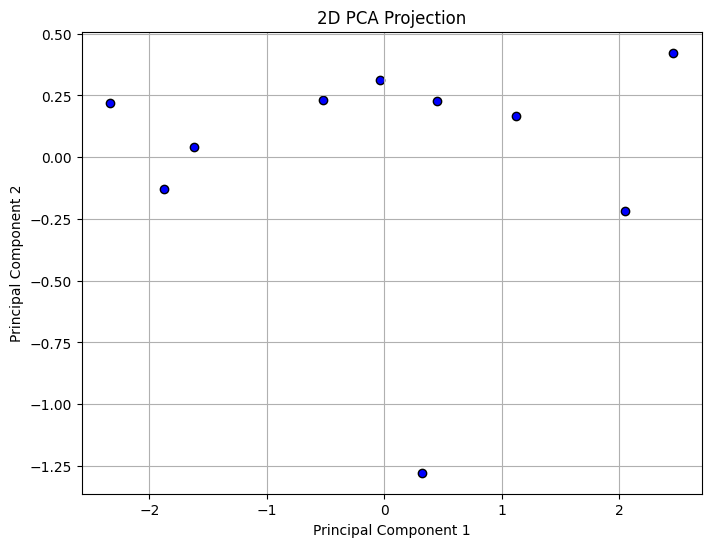

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(reduced_df['PC1'],reduced_df['PC2'],color='blue',edgecolor='k')
plt.title('2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()